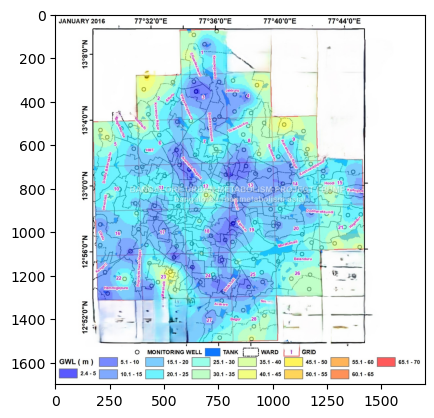

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

image1 = cv2.imread('100.jpg')

# Change color to RGB (from BGR)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

plt.imshow(image1)


In [22]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image1.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)


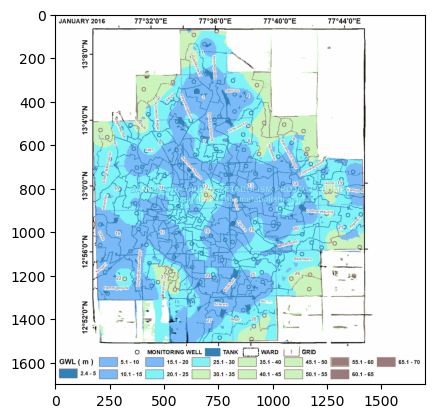

In [24]:
#the below line of code defines the criteria for the algorithm to stop running, 
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy) 
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 7
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image1.shape))

plt.imshow(segmented_image)


In [25]:
centers


array([[154, 122, 122],
       [126, 244, 247],
       [203, 244, 188],
       [123, 186, 248],
       [ 13,  13,  15],
       [ 49, 129, 182],
       [254, 254, 255]], dtype=uint8)

In [9]:
# Assuming you have a specific pixel coordinate (i, j)
pixel_label = labels[500, 0]

# pixel_label will now hold the cluster number (0 to k-1) that this pixel belongs to



In [10]:
print(pixel_label)

14


In [29]:
import cv2
import numpy as np

# Assuming you have labels and centers arrays after clustering
unique_labels, counts = np.unique(labels, return_counts=True)

# Print number of pixels per cluster
for label, count in zip(unique_labels, counts):
  print(f"Cluster {label} has {count} pixels")

# Calculate average color per cluster
cluster_colors = np.zeros((len(unique_labels), 3), dtype=np.float32)
for i, label in enumerate(unique_labels):
  # Get pixels belonging to this cluster
  cluster_pixels = np.where[labels == label]
  # Average color channels (assuming BGR image)
  cluster_colors[i] = image1[cluster_indices[0], cluster_indices[1], :]

# Print average color for each cluster (might need conversion depending on OpenCV color space)
for i, color in enumerate(cluster_colors):
  print(f"Cluster {i} average color: B {color[0]:.2f}, G {color[1]:.2f}, R {color[2]:.2f}")


Cluster 0 has 78785 pixels
Cluster 1 has 386773 pixels
Cluster 2 has 191211 pixels
Cluster 3 has 470376 pixels
Cluster 4 has 48662 pixels
Cluster 5 has 152136 pixels
Cluster 6 has 1562057 pixels


TypeError: 'function' object is not subscriptable